In [2]:
import pandas as pd
import ast
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df_synth = pd.read_csv('test_df_results.csv')
df_weak = pd.read_csv('predictions_true_abstracts.csv')
df_no_synth = pd.read_csv('test_df_no_synth_results.csv')

df_synth.loc[:, 'prediction'] = [ast.literal_eval(pred) for pred in df_synth.prediction]
df_weak.loc[:, 'prediction'] = [ast.literal_eval(pred) for pred in df_weak.prediction]
df_no_synth.loc[:, 'prediction'] = [ast.literal_eval(pred) for pred in df_no_synth.prediction]

In [4]:
mapping = {f'LABEL_{i}': i for i in range(18)}
df_synth.loc[:, 'prediction'] = [mapping[pred['label']] for pred in df_synth.prediction]
df_weak.loc[:, 'prediction'] = [mapping[pred['label']] for pred in df_weak.prediction]
df_no_synth.loc[:, 'prediction'] = [mapping[pred['label']] for pred in df_no_synth.prediction]

In [6]:
print('Accuracy:', 
        f'Synth: {len(df_synth[(df_synth.is_abstract == 1) & (~df_synth.label.isin([0, 16])) & (df_synth.prediction == df_synth.label)]) / len(df_synth[(df_synth.is_abstract == 1) & (~df_synth.label.isin([0, 16]))]):.4}',
        f'Weakly Labeled: {len(df_weak[(df_weak.is_abstract == 1) & (~df_weak.label.isin([0, 16])) & (df_weak.prediction == df_weak.label)]) / len(df_weak[(df_weak.is_abstract == 1) & (~df_weak.label.isin([0, 16]))]):.4}')

Accuracy: Synth: 0.7569 Weakly Labeled: 0.751


In [7]:
for l in sorted(df_synth.label.unique()):
    print('LABEL:', l)
    print('Observations',
          f'Synth: {len(df_synth[(df_synth.is_abstract == 1) & (df_synth.label == l)])}',
          f'Weakly Labeled: {len(df_weak[(df_weak.is_abstract == 1) & (df_weak.label == l)])}')
    print('Accuracy:', 
          f'Synth: {len(df_synth[(df_synth.is_abstract == 1) & (df_synth.label == l) & (df_synth.prediction == df_synth.label)]) / len(df_synth[(df_synth.is_abstract == 1) & (df_synth.label == l)]):.4}',
          f'Weakly Labeled: {len(df_weak[(df_weak.is_abstract == 1) & (df_weak.label == l) & (df_weak.prediction == df_weak.label)]) / len(df_weak[(df_weak.is_abstract == 1) & (df_weak.label == l)]):.4}')
    print(25*'=')

LABEL: 0
Observations Synth: 306 Weakly Labeled: 40
Accuracy: Synth: 0.8889 Weakly Labeled: 0.175
LABEL: 1
Observations Synth: 18 Weakly Labeled: 18
Accuracy: Synth: 0.6111 Weakly Labeled: 0.7222
LABEL: 2
Observations Synth: 13 Weakly Labeled: 10
Accuracy: Synth: 0.6923 Weakly Labeled: 0.8
LABEL: 3
Observations Synth: 6 Weakly Labeled: 7
Accuracy: Synth: 0.8333 Weakly Labeled: 0.8571
LABEL: 4
Observations Synth: 12 Weakly Labeled: 17
Accuracy: Synth: 0.8333 Weakly Labeled: 0.7059
LABEL: 5
Observations Synth: 20 Weakly Labeled: 25
Accuracy: Synth: 0.95 Weakly Labeled: 0.96
LABEL: 6
Observations Synth: 43 Weakly Labeled: 44
Accuracy: Synth: 1.0 Weakly Labeled: 0.9773
LABEL: 7
Observations Synth: 19 Weakly Labeled: 17
Accuracy: Synth: 0.8947 Weakly Labeled: 0.5882
LABEL: 8
Observations Synth: 11 Weakly Labeled: 14
Accuracy: Synth: 0.4545 Weakly Labeled: 0.5
LABEL: 9
Observations Synth: 9 Weakly Labeled: 12
Accuracy: Synth: 0.7778 Weakly Labeled: 0.5
LABEL: 10
Observations Synth: 28 Weakly

In [64]:
for l in sorted(df_synth.label.unique()):
    print('LABEL:', l)
    print('Observations',
          f'Synth: {len(df_synth[(df_synth.is_abstract == 1) & (df_synth.label == l)])}',
          f'No synth: {len(df_no_synth[(df_no_synth.is_abstract == 1) & (df_no_synth.label == l)])}')
    print('Accuracy:', 
          f'Synth: {len(df_synth[(df_synth.is_abstract == 1) & (df_synth.label == l) & (df_synth.prediction == df_synth.label)]) / len(df_synth[(df_synth.is_abstract == 1) & (df_synth.label == l)]):.4}',
          f'No synth: {len(df_no_synth[(df_no_synth.is_abstract == 1) & (df_no_synth.label == l) & (df_no_synth.prediction == df_no_synth.label)]) / len(df_no_synth[(df_no_synth.is_abstract == 1) & (df_no_synth.label == l)]):.4}')
    print(25*'=')

LABEL: 0
Observations Synth: 306 No synth: 305
Accuracy: Synth: 0.8889 No synth: 0.9443
LABEL: 1
Observations Synth: 18 No synth: 18
Accuracy: Synth: 0.6111 No synth: 0.5556
LABEL: 2
Observations Synth: 13 No synth: 13
Accuracy: Synth: 0.6923 No synth: 0.6923
LABEL: 3
Observations Synth: 6 No synth: 7
Accuracy: Synth: 0.8333 No synth: 0.4286
LABEL: 4
Observations Synth: 12 No synth: 11
Accuracy: Synth: 0.8333 No synth: 0.8182
LABEL: 5
Observations Synth: 20 No synth: 22
Accuracy: Synth: 0.95 No synth: 0.8182
LABEL: 6
Observations Synth: 43 No synth: 48
Accuracy: Synth: 1.0 No synth: 0.9792
LABEL: 7
Observations Synth: 19 No synth: 21
Accuracy: Synth: 0.8947 No synth: 0.619
LABEL: 8
Observations Synth: 11 No synth: 6
Accuracy: Synth: 0.4545 No synth: 0.5
LABEL: 9
Observations Synth: 9 No synth: 12
Accuracy: Synth: 0.7778 No synth: 0.75
LABEL: 10
Observations Synth: 28 No synth: 26
Accuracy: Synth: 0.5357 No synth: 0.4615
LABEL: 11
Observations Synth: 8 No synth: 8
Accuracy: Synth: 0.5 N

In [50]:
for l in sorted(df.label.unique()):
    print('LABEL:', l)
    print('Observations', len(df[(df.is_abstract == 1) & (df.label == l)]))
    print('Accuracy:', len(df[(df.is_abstract == 1) & (df.label == l) & (df.prediction == df.label)]) / len(df[(df.is_abstract == 1) & (df.label == l)]))
    print(25*'=')

LABEL: 0
Observations 306
Accuracy: 0.8888888888888888
LABEL: 1
Observations 18
Accuracy: 0.6111111111111112
LABEL: 2
Observations 13
Accuracy: 0.6923076923076923
LABEL: 3
Observations 6
Accuracy: 0.8333333333333334
LABEL: 4
Observations 12
Accuracy: 0.8333333333333334
LABEL: 5
Observations 20
Accuracy: 0.95
LABEL: 6
Observations 43
Accuracy: 1.0
LABEL: 7
Observations 19
Accuracy: 0.8947368421052632
LABEL: 8
Observations 11
Accuracy: 0.45454545454545453
LABEL: 9
Observations 9
Accuracy: 0.7777777777777778
LABEL: 10
Observations 28
Accuracy: 0.5357142857142857
LABEL: 11
Observations 8
Accuracy: 0.5
LABEL: 12
Observations 5
Accuracy: 0.8
LABEL: 13
Observations 32
Accuracy: 0.59375
LABEL: 14
Observations 4
Accuracy: 1.0
LABEL: 15
Observations 23
Accuracy: 0.8695652173913043
LABEL: 16
Observations 840
Accuracy: 0.9845238095238096
LABEL: 17
Observations 4
Accuracy: 0.25


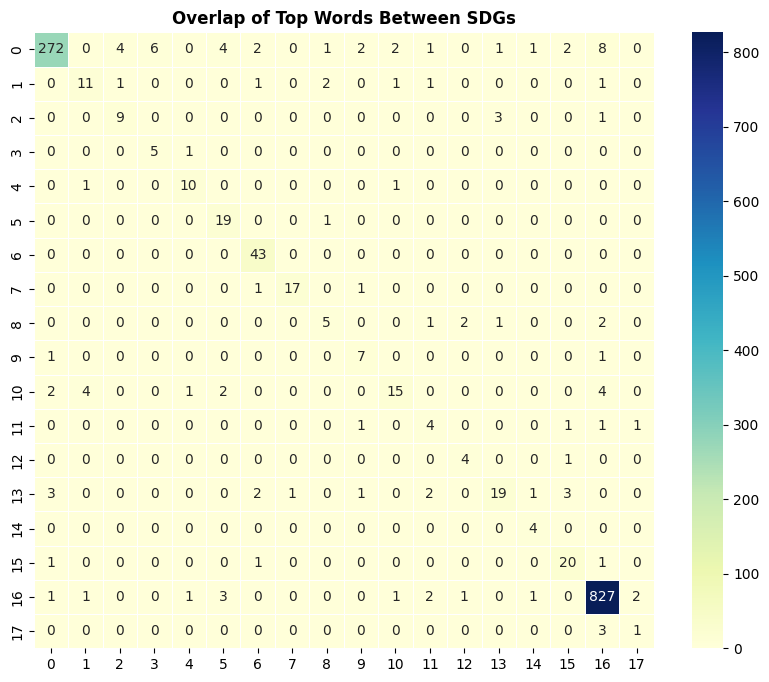

In [40]:
import seaborn as sns

# add axis labels if required
classes = df.label.unique()

# compute confusion matrix
conf_mat = confusion_matrix(df[df.is_abstract == 1].label.to_list(), df[df.is_abstract == 1].prediction.to_list()) # Use predictions and target from the fine-tuned network with frozen layers

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Overlap of Top Words Between SDGs', fontweight="bold")
plt.show()